In [3]:
!ls
# Numerical Imporst 
import pandas as pd
import numpy as np
import scipy 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Python 
import os

# sklearn 
from sklearn.metrics import f1_score # f1_score(y_true, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# scipy
from scipy.cluster import hierarchy as hc # for dendograms 

Full.ipynb     README.txt     sum_tab_2.csv  train_cli.tsv
Import.ipynb   RNA-Seq.ipynb  test_cli.tsv   train_pro.tsv
NA.ipynb       start.ipynb    test_pro.tsv   train_rna.tsv
Protein.ipynb  sum_tab_1.csv  test_rna.tsv   visuals.ipynb


In [4]:
df_train_pro = pd.read_table(f'{os.getcwd()}/train_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_pro = pd.read_table(f'{os.getcwd()}/test_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_rna = pd.read_table(f'{os.getcwd()}/train_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_rna = pd.read_table(f'{os.getcwd()}/test_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_cli = pd.read_csv(f'{os.getcwd()}/train_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_test_cli = pd.read_csv(f'{os.getcwd()}/test_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_train_mislabel = pd.read_csv(f'{os.getcwd()}/sum_tab_1.csv', 
                           low_memory=False,)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [5]:
# df_train_pro
# df_test_pro
# df_train_rna
# df_test_rna
# df_train_cli
# df_test_cli
# df_train_mislabel

In [6]:
# Come back to the way you handle this NA, sophisticated way will imporve by at least 5% 
train_pro = df_train_pro.copy(deep=True)
train_pro = train_pro.fillna(train_pro.median())
train_pro.index.name = 'sample'

test_pro = df_test_pro.copy(deep=True)
test_pro = test_pro.fillna(test_pro.median())
test_pro.index.name = 'sample'


train_rna = df_train_rna.copy(deep=True)
train_rna = train_rna.fillna(train_rna.median())
train_rna.index.name = 'sample'

test_rna = df_test_rna.copy(deep=True)
test_rna = test_rna.fillna(test_rna.median())
test_rna.index.name = 'sample'

In [7]:
# df_train_pro
# train_pro
# df_test_pro
# test_pro

In [8]:
# df_train_rna
# train_rna
# df_test_rna
# test_rna

In [9]:
train_cli = df_train_cli.copy(deep=True)
train_cli = train_cli.set_index('sample')
train_cli = train_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

test_cli = df_test_cli.copy(deep=True)
test_cli = test_cli.set_index('sample')
test_cli = test_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

In [10]:
# df_train_cli
# train_cli
# df_test_cli
# test_cli

In [11]:
train_mislabel = df_train_mislabel.copy(deep=True)
train_mislabel = train_mislabel.set_index('sample')

In [12]:
# df_train_mislabel
# train_mislabel

In [13]:
train_pro.reset_index(drop=True, inplace=True)
train_rna.reset_index(drop=True, inplace=True)
train_cli.reset_index(drop=True, inplace=True)
train_mislabel.reset_index(drop=True, inplace=True)

In [14]:
# train_pro
# train_rna
# train_cli
# train_mislabel

In [15]:
train_pro_combined = pd.concat([train_mislabel, train_cli, train_pro], axis=1)
train_rna_combined = pd.concat([train_mislabel, train_cli, train_rna], axis=1)

In [29]:
train_pro_combined
# train_rna_combined

,mismatch,gender,msi,A1BG,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AARS,AARS2,AASDHPPT,AATF,ABAT,ABCB7,ABCC1,ABCC3,ABCD1,ABCD3,ABCE1,ABCF1,ABCF2,ABCF3,ABHD10,ABHD11,ABHD12,ABHD14B,ABHD16A,ABI1,ABLIM1,ABR,ABRACL,ACAA1,ACAA2,ACACA,ACAD10,ACAD8,ACAD9,ACADM,ACADS,ACADSB,ACADVL,ACAP2,ACAT1,ACAT2,ACBD3,ACBD5,ACE,ACE2,...,XRCC4,XRCC5,XRCC6,XRN1,XRN2,YARS,YARS2,YBX1,YBX3,YIPF4,YIPF5,YIPF6,YKT6,YLPM1,YME1L1,YTHDF2,YTHDF3,YWHAB,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZAK,ZBED1,ZBTB7A,ZC3H11A,ZC3H13,ZC3H14,ZC3H15,ZC3H4,ZC3HAV1,ZC3HAV1L,ZCCHC8,ZFPL1,ZFR,ZG16,ZMPSTE24,ZMYM3,ZNF185,ZNF207,ZNF280C,ZNF326,ZNF638,ZNF706,ZPR1,ZW10,ZYX,ZZEF1
0,0,1,0,2.919688,5.737663,2.002401,1.461113,1.029129,1.731009,1.003991,4.791964,1.729555,1.590431,2.127685,1.123337,1.707102,1.122820,2.145430,1.160081,3.447664,4.354417,3.118047,1.038028,1.960644,3.174522,3.772443,2.656568,3.017769,2.275741,2.003232,1.674897,1.500865,2.544188,4.408981,5.663579,2.526972,1.032987,1.560157,2.946920,3.341373,3.109062,3.340860,5.213860,1.604037,4.769457,1.677481,2.770257,1.021148,1.710693,0.623363,...,0.969840,5.853167,5.692673,1.532790,3.632066,4.390283,2.785913,2.733676,2.341250,1.007287,1.006993,1.144088,2.698599,1.473819,1.917234,1.455458,1.493388,4.193716,5.192265,3.821649,4.017592,4.665611,6.300753,1.915149,1.620717,1.660843,1.030688,0.992511,1.652999,1.368638,1.630672,1.051260,2.915539,1.624048,1.040985,2.097838,2.657478,5.774241,2.280993,1.163372,1.165423,2.078553,1.530701,1.505944,1.007971,1.005565,1.016313,1.859706,3.834986,1.722888
1,1,1,0,3.753851,5.752416,1.090277,1.376261,1.029129,1.585752,1.473388,4.034208,2.201194,1.635938,2.531586,4.954608,1.907480,1.128495,2.145430,1.164224,1.850178,4.472278,2.318826,1.455838,1.585008,3.709617,4.505986,3.109738,2.383159,3.438003,0.958515,1.935985,1.805123,2.106792,3.056795,5.522292,2.175290,1.038237,2.013298,3.660046,4.501140,4.024598,3.769179,5.456711,1.051406,5.000324,1.721725,2.871860,1.024653,1.385259,0.626270,...,1.044018,5.759085,6.105171,0.993673,3.202251,2.857531,2.834447,3.542736,2.390906,1.007287,1.010723,1.144088,2.132064,2.413960,2.751047,1.632909,1.529682,5.019476,5.062740,3.819669,3.993814,4.389870,6.139485,1.945070,1.662572,1.660843,1.034917,0.995823,1.680459,1.368638,3.392088,2.212228,2.967906,1.312801,1.927286,0.970673,1.792636,3.260775,1.879562,1.163372,1.165423,2.560404,1.530701,2.515630,1.516790,1.009703,1.101494,1.465056,4.156957,1.722888
2,0,0,0,3.513302,5.601927,2.789359,1.504314,1.029129,1.585752,1.362621,4.460875,1.782342,1.645671,2.202844,2.133075,1.937006,1.390573,2.789410,1.164224,2.975771,4.105296,2.537285,1.041727,1.004301,3.086105,4.364739,2.161714,3.171235,2.337007,1.439752,1.051310,1.941552,2.915653,4.394600,5.390535,1.818573,1.080427,2.044713,2.663259,3.491127,3.528062,2.659341,5.344482,1.655487,4.306387,3.496385,1.957638,1.540380,1.770803,1.476798,...,0.974529,5.658831,5.743094,1.532790,2.816889,3.849770,1.258000,2.404759,1.602509,1.006134,1.079447,1.144088,3.002017,0.986676,1.814024,1.632909,1.403137,4.772247,5.047297,3.978143,3.574884,4.230233,5.876627,0.947357,1.072991,1.660843,1.034917,1.315018,1.703609,1.741504,2.703586,1.056045,3.298531,1.312801,1.569004,1.727459,2.115843,4.629868,2.353838,1.163372,1.019584,2.122499,1.530701,1.554500,1.303811,1.009703,1.019879,1.932920,4.303349,1.722888
3,0,1,0,3.588087,6.092091,2.085648,1.007233,1.029129,1.585752,1.551876,4.293510,1.171600,1.745229,1.614150,1.142146,1.707102,1.148190,2.145430,1.160081,2.192560,4.208789,3.028908,1.942462,1.018704,2.443460,3.011153,2.472348,2.511655,2.913866,1.807527,1.660824,2.230770,2.123724,3.354441,4.682992,1.912089,1.080427,1.610489,2.463167,1.840899,1.628958,2.645710,5.277064,1.066248,4.523365,2.127912,2.502701,1.540380,1.454548,1.476798,...,1.044018,5.698497,5.655790,1.532790,2.972644,4.141407,2.314568,2.888977,1.618239,1.007287,1.079447,1.144088,2.869346,0.999796,1.814024,1.011424,1.616613,3.784756,5.332163,2.703492,3.271345,4.095585,5.595029,1.244139,2.636959,1.660843,1.035846,1.521970,2.265474,1.368638,1.753413,1.847031,1.588

In [ ]:
train_combined_correct = train_pro_combined.loc[train_pro_combined['mismatch'] == 0]
X_correct = train_combined_correct.drop(['mismatch'], axis=1, inplace=False)
X_correct.reset_index(drop=True, inplace=True)

gender_correct = X_correct['gender']
msi_correct = X_correct['msi']
X_correct = X_correct.drop(['gender', 'msi'], axis=1, inplace=False)

columns = X_correct.columns

In [27]:
# X_correct
# gender_correct
# msi_correct

In [30]:
X_gender_train, X_gender_valid, y_gender_train, y_gender_valid = train_test_split(X_correct.values.astype(int),
                                                                                  gender_correct, 
                                                                                  test_size=0.3)

In [31]:
# X_train
# X_valid
# y_train
# y_valid

In [ ]:
# forest = RandomForestClassifier(n_estimators=500, 
#                                 n_jobs=-1, 
#                                 oob_score=True)

# # sorted(forest.get_params().keys())

# gs = GridSearchCV(estimator=forest,
#                   param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
#                                'max_features':[None, 0.5, 'sqrt', 'log2']}],
#                   scoring='accuracy',
#                   cv=5,)

# gs = gs.fit(X_gender_train, y_gender_train)
# print(gs.best_score_)
# print(gs.best_params_)

 1) MYO9B                          0.070962
 2) EMILIN1                        0.026488
 3) MRPL16                         0.024626
 4) EIF4G2                         0.024382
 5) TNXB                           0.022119
 6) ARFIP1                         0.021908
 7) GAR1                           0.018302
 8) SLC35A2                        0.018056
 9) GADD45GIP1                     0.016655
10) TJP2                           0.015659
11) ALDH1A1                        0.014079
12) PGM2                           0.013358
13) LTBP1                          0.012227
14) NNMT                           0.010702
15) COX7C                          0.010697
16) FBN1                           0.010502
17) SERPINB1                       0.010249
18) U2AF1L5                        0.008661
19) COG3                           0.007922
20) ASPN                           0.007751
21) METTL1                         0.006863
22) DDT                            0.006784
23) FBLN1                       

<BarContainer object of 4118 artists>

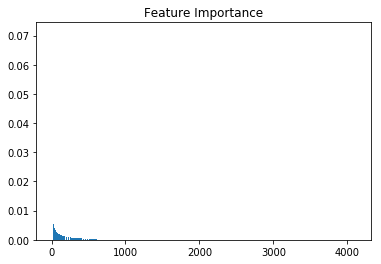

In [32]:
gender_forest = RandomForestClassifier(n_estimators=500,
                                min_samples_leaf=3,
                                max_features=None,
                                n_jobs=-1, 
                                oob_score=True)
gender_forest.fit(X_gender_train, y_gender_train)

gender_importances = gender_forest.feature_importances_
gender_indices = np.argsort(gender_importances)[::-1]

# for f in range(X_gender_train[1]): # to get the full results
for f in range(100):
    print("%2d) %-*s %f" % (f + 1, 30, columns[gender_indices[f]], gender_importances[gender_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_gender_train.shape[1]), gender_importances[gender_indices], align='center')

In [33]:
y_gender_pred = gender_forest.predict(X_gender_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))
print('OOB score: ', gender_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       1.00      0.12      0.22         8
          1       0.65      1.00      0.79        13

avg / total       0.78      0.67      0.57        21

OOB score:  0.5957446808510638


In [49]:
gender_select = SelectFromModel(gender_forest, threshold=0.005)

gender_select.fit(X_gender_train, y_gender_train)

X_gender_important_train = gender_select.transform(X_gender_train)
X_gender_important_train_df = pd.DataFrame(X_gender_important_train)
X_gender_important_valid = gender_select.transform(X_gender_valid)

In [50]:
gender_forest.fit(X_gender_important_train, y_gender_train)
y_pred = gender_forest.predict(X_gender_important_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))
print('OOB score: ', gender_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       1.00      0.12      0.22         8
          1       0.65      1.00      0.79        13

avg / total       0.78      0.67      0.57        21

OOB score:  0.7872340425531915


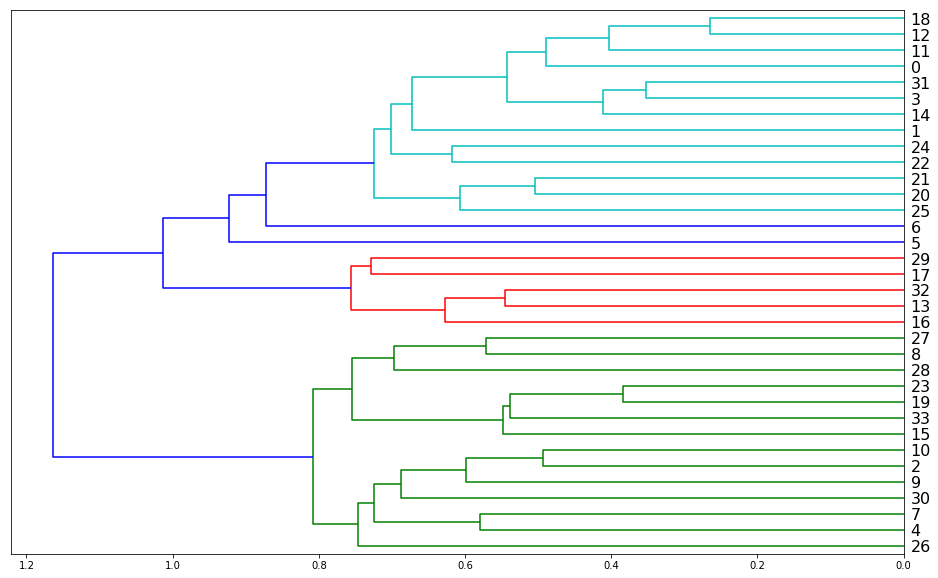

In [51]:
gender_corr = np.round(scipy.stats.spearmanr(X_gender_important_train).correlation, 4)
gender_corr_condensed = hc.distance.squareform(1-gender_corr)
z = hc.linkage(gender_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
gender_dendrogram = hc.dendrogram(z, labels=X_gender_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()

In [52]:
X_msi_train, X_msi_valid, y_msi_train, y_msi_valid = train_test_split(X_correct.values.astype(int),
                                                                      msi_correct,
                                                                      test_size=0.3)

In [53]:
# forest = RandomForestClassifier(n_estimators=500, 
#                                 n_jobs=-1, 
#                                 oob_score=True)

# # sorted(forest.get_params().keys())

# gs = GridSearchCV(estimator=forest,
#                   param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
#                                'max_features':[None, 0.5, 'sqrt', 'log2']}],
#                   scoring='accuracy',
#                   cv=5,)

# gs = gs.fit(X_msi_train, y_msi_train)
# print(gs.best_score_)
# print(gs.best_params_)

 1) TAP1                           0.092668
 2) APOL2                          0.085171
 3) LCP1                           0.079227
 4) PTPN6                          0.069296
 5) CASK                           0.040938
 6) UBE2L6                         0.034739
 7) ICAM1                          0.032435
 8) ITGB2                          0.029627
 9) SDF2L1                         0.022635
10) CKB                            0.020334
11) LAP3                           0.019781
12) IFI30                          0.018288
13) PTPRC                          0.015377
14) HSDL2                          0.015031
15) RFC2                           0.012395
16) WARS                           0.012353
17) IFI35                          0.011708
18) TYMP                           0.011674
19) CSRP2                          0.011510
20) TAPBP                          0.010998
21) ERMP1                          0.010522
22) ANP32E                         0.010190
23) HP                          

<BarContainer object of 4118 artists>

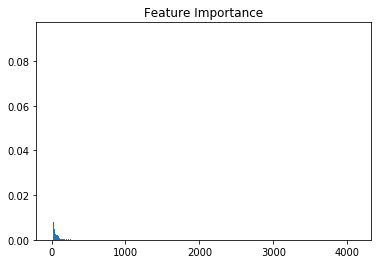

In [54]:
msi_forest = RandomForestClassifier(n_estimators=500,
                                min_samples_leaf=5,
                                max_features=None,
                                n_jobs=-1, 
                                oob_score=True)

msi_forest.fit(X_msi_train, y_msi_train)

msi_importances = msi_forest.feature_importances_
msi_indices = np.argsort(msi_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(100):
    print("%2d) %-*s %f" % (f + 1, 30, columns[msi_indices[f]], msi_importances[msi_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_msi_train.shape[1]), msi_importances[msi_indices], align='center')

In [55]:
y_msi_pred = msi_forest.predict(X_msi_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))
print('OOB score: ', msi_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.95      1.00      0.97        18
          1       1.00      0.67      0.80         3

avg / total       0.95      0.95      0.95        21

OOB score:  0.8085106382978723


In [56]:
msi_select = SelectFromModel(msi_forest, threshold=0.005)

msi_select.fit(X_msi_train, y_msi_train)

X_msi_important_train = msi_select.transform(X_msi_train)
X_msi_important_train_df = pd.DataFrame(X_msi_important_train)
X_msi_important_valid = msi_select.transform(X_msi_valid)

In [57]:
msi_forest.fit(X_msi_important_train, y_msi_train)
y_msi_pred = msi_forest.predict(X_msi_important_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))
print('OOB score: ', msi_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.94      0.94      0.94        18
          1       0.67      0.67      0.67         3

avg / total       0.90      0.90      0.90        21

OOB score:  0.8085106382978723


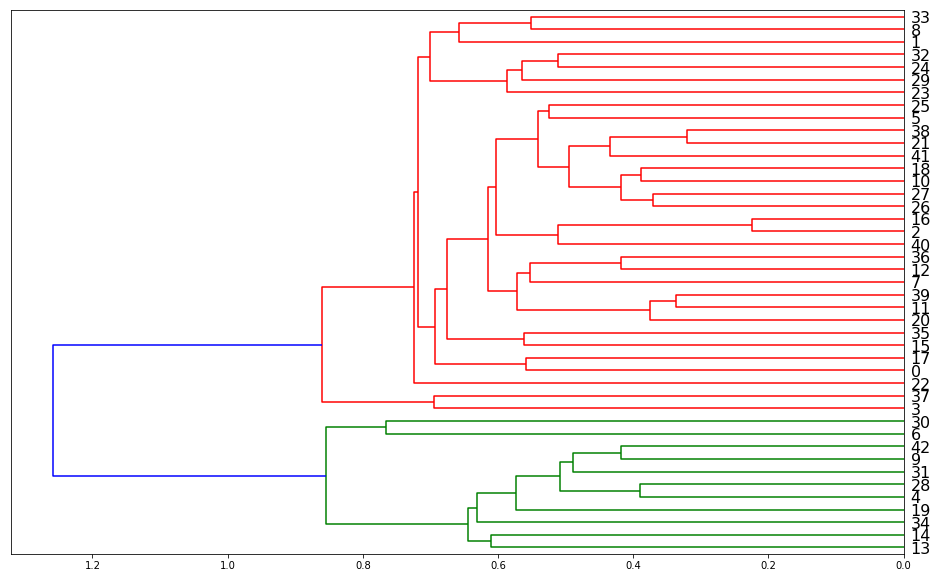

In [58]:
msi_corr = np.round(scipy.stats.spearmanr(X_msi_important_train).correlation, 4)
msi_corr_condensed = hc.distance.squareform(1-msi_corr)
msi_z = hc.linkage(msi_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
msi_dendrogram = hc.dendrogram(msi_z, labels=X_msi_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()